## CM 3 Assesseurs et mutateurs, notion de pointer

La classe Verbe que nous avons vu en CM 2 :

In [1]:
class Verbe:
    
    verbesEtre = ["aller", "venir", "entrer", "sortir", "monter", "descendre", 
                  "tomber", "rester", "naître", "mourir", "arriver", "partir"]

    
    # listes de terminaisons
    term_present = {
            1: ["e", "es", "e", "ons", "ez", "ent"], 
            2: ["is", "is", "it", "issons", "issez", "issent"]
        }

    term_imparfait = {
            1 : ["ais", "ais", "ait", "ions", "iez", "aient"],
            2 : ["issais", "issais", "issait", "issions", "issiez", "issaient"]
        }
    term_futur = { 
            1: ["erai", "eras", "era", "erons", "erez", "eront"], 
            2: ["irai", "iras", "ira", "irons", "irez", "iront"]
        }
    term_cond_present = {
            1: ["erais", "erais", "erait", "erions", "eriez", "eraient"], 
            2: ["irais", "irais", "irait", "irions", "iriez", "iraient"]
        }

    # avoir et être pour les temps composés :
    conj_auxil = {
            "avoir" : ["ai", "as", "a", "avons", "avez", "ont"],
            "être"  : ["suis", "es", "est", "sommes", "êtes", "sont"]
            }   

    def __init__(self, infinitif, base = "", groupe = 0):
        self.infinitif = infinitif
        if base != "" :
            self.base = base
        else :
            self.base = infinitif[0:-2]
        if groupe != 0 :
            self.groupe = groupe
        else :
            self.groupe = 3
            if infinitif.endswith("er") :
                self.groupe = 1
            elif infinitif.endswith("ir") :
                self.groupe = 2
                
        self.est_pronominal = False
        if infinitif.startswith("se ") or infinitif.startswith("s'"):
            self.est_pronominal = True
        
        self.verbe_auxil = "avoir"
        if self.est_pronominal or self.infinitif in Verbe.verbesEtre:
            self.verbe_auxil = "être"
            
        if self.groupe == 1:
            self.forme_pp = self.base + "é"

        if self.groupe == 2:
            self.forme_pp = self.base + "i"
        
    
    def __str__(self) :
        """Methode pour l'affichage"""
        return self.infinitif + " : " + self.base + " " + str(self.groupe)

    
    def conjuguer(self, pron, temps='present') :
        """Conjugaison avec un PronomPersonnel"""
        
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.personne - 1
        if pron.nombre == "pl" :
            indice = pron.personne + 2
        
        if temps in ["present", "imparfait", "futur", "cond_present"] :
            liste_term = Verbe.terminaisons(self.groupe, temps)

            if not liste_term:
                return "[forme inconnue]"

            return pron.forme + " " + self.base + liste_term[indice]
    
        if temps=="passe_compose" :
            forme_conjuguee = pron.forme + " " + Verbe.conj_auxil[self.verbe_auxil][indice] + " " + self.forme_pp
            
            if pron.genre == "f" and self.verbe_auxil == "être" :
                forme_conjuguee += "e"
            
            if pron.nombre == "pl" and self.verbe_auxil == "être" :
                forme_conjuguee += "s"    
            
            return forme_conjuguee
                
        return "[forme inconnue]"
    
    @staticmethod
    def terminaisons(groupe = 1, temps = "present"):
        if temps=="present" :
            return Verbe.term_present[groupe]
        
        if temps=="imparfait" :
            return Verbe.term_imparfait[groupe]
        
        if temps == 'futur' :
            return Verbe.term_futur[groupe]
        
        if temps == 'cond_present' :
            return Verbe.term_cond_present[groupe]

In [2]:
class PronomPersonnel :
    # liste de pronoms
    liste_pronoms = ["je", "tu", ["il", "elle"], "nous", "vous", ["ils", "elles"] ]
               
    # constructeur
    def __init__(self, nombre, personne, genre="m"):
        # verification de la validite des donnees :
        if nombre not in ["sg", "pl"] or personne not in [1,2,3] or genre not in ["m", "f"]:
            print("Erreur ! Appel à PronomPersonnel avec arguments invalides.")
            return
        
        self.nombre = nombre
        self.personne = personne
        self.genre = genre
        
        if nombre == "sg" :
            self.forme = PronomPersonnel.liste_pronoms[personne-1]
        else :
            self.forme = PronomPersonnel.liste_pronoms[personne+2]
        
        if personne == 3 :
            if genre == "m":
                self.forme = self.forme[0]
            else :
                self.forme = self.forme[1]
                
    # conversion en str
    def __str__(self):
        return self.forme + " (" + self.nombre + "," + str(self.personne) + self.genre + ")"

    # affichage de la liste des pronoms
    @staticmethod
    def pronoms():
        print(PronomPersonnel.liste_pronoms)

### Problématique : contrôler la cohérence des données des objets

In [3]:
v = Verbe("penser")
pron = PronomPersonnel("sg", 3, "f")

print(v.conjuguer(pron, "passe_compose"))

elle a pensé


In [4]:
# rien ne nous empeche ici de modifier les attributs de l'objet:
v.verbe_auxil = "être"
v.groupe = 2

# le verbe n'est plus valide :
print(v.conjuguer(pron, "passe_compose"))
print(v.conjuguer(pron, "futur"))

elle est pensée
elle pensira


En réalité, certains attributs de l'objet sont des propriétés qui ne devraient pas être modifiables une fois l'objet créé. Un verbe de 1e groupe ne peut pas passer en 2e groupe au cours du programme - cela serait incorrect du point de vue linguistique. Nous pouvons prendre des précautions pour prévenir ces modifications dans l'écriture de la classe.

Le fait d'empêcher la modification de certains attributs permet de :
- rendre l'utilisation des objets plus simple (moins d'attributs qu'il faut gérer dans les programmes). Par exemple, si on travaille en équipe, la personne qui utilise la classe n'a pas besoin de connaître l'existance de tous les attributs qui sont utilisés dans les algorithmes - elle aura accès uniquement aux attributs "visibles" pour utiliser les objets.
- prévenir les erreurs de programmation - éviter que la modification de certains attributs soit possible à partir du programme principal.

Les attributs qu'on ne pourra pas modifier en dehors de la classe s'appellent **attributs privés**.

### Attributs privés

Pour définir un attribut privé en python, il faut précéder son nom par _ _.

In [5]:
class VbSimple:
    '''Extrait de la classe pour montrer les attributs privés'''
    
    def __init__(self, infinitif):
        self.infinitif = infinitif
        self.__base = infinitif[0:-2]
        self.__groupe = 3
        
        if infinitif.endswith("er"): 
            self.__groupe = 1

        elif infinitif.endswith("ir"): 
            self.__groupe = 2
            
    def __str__(self) :
        return self.infinitif + " : " + self.__base + " " + str(self.__groupe)

In [6]:
v = VbSimple("penser")

In [ ]:
v.

In [7]:
print(v)

penser : pens 1


In [10]:
print(v.__base)
# Erreur, nous n'avons pas acces à ce champs

penser


In [11]:
v.__base = "nouvelle_base"
v.__groupe = 3
# ces __base et __groupe sont différents, ils ne vont pas participer dans le fonctionnement de l'objet
print(v)

penser : pens 1


In [12]:
v.infinitif = "marcher"
# modification possible !
# Ce n'est pas souhaitable, donc il faut rendre privé infinitif...

print(v)

marcher : pens 1


La classe avec tous les attributs privés : 

In [13]:
class VbSimple:
    '''Extrait de la classe pour montrer les attributs privés'''
    
    def __init__(self, infinitif):
        self.__infinitif = infinitif
        self.__base = infinitif[0:-2]
        self.__groupe = 3

        if infinitif.endswith("er"): 
            self.__groupe = 1

        elif infinitif.endswith("ir"): 
            self.__groupe = 2
            
    def __str__(self) :
        return self.__infinitif + " : " + self.__base + " " + str(self.__groupe)

In [14]:
v = VbSimple("penser")

In [16]:
print(v.__infinitif)

AttributeError: 'VbSimple' object has no attribute '__infinitif'

Problème : si les attributs sont privés, on n'a plus accès à ces informations, alors qu'elles peuvent être utiles pour le programme (par ex. l'infinitif d'un verbe).

### Assesseurs (getters) et mutateurs (setters)

Pour accéder à l'infinitif, je peux créer une méthode dans la classe qui renvoie la valeur :

In [17]:
class VbSimple:
    '''Extrait de la classe pour montrer les attributs privés'''
    
    def __init__(self, infinitif):
        self.__infinitif = infinitif
        self.__base = infinitif[0:-2]
        self.__groupe = 3

        if infinitif.endswith("er"): 
            self.__groupe = 1

        elif infinitif.endswith("ir"): 
            self.__groupe = 2
            
    def __str__(self) :
        return self.__infinitif + " : " + self.__base + " " + str(self.__groupe)
    
    def getInfinitif(self) :
        return self.__infinitif

In [19]:
v = VbSimple("penser")
print(v.getInfinitif())
print(v.__infinitif)

penser


AttributeError: 'VbSimple' object has no attribute '__infinitif'

**Assesseurs (getters)** : méthodes qui permettent d'obtenir la valeur de certains attributs de la classe (attributs qui sont normalement privés). Ils ont traditionnellement des noms comme _getAttribut()_ (getters en anglais).

L'implémentation d'un assesseur est toujours la même :

In [17]:
class VbSimple:
    '''Extrait de la classe pour montrer les attributs privés'''
    
    def __init__(self, infinitif):
        self.__infinitif = infinitif
        self.__base = infinitif[0:-2]
        self.__groupe = 3

        if infinitif.endswith("er"): 
            self.__groupe = 1

        elif infinitif.endswith("ir"): 
            self.__groupe = 2
            
    def __str__(self) :
        return self.__infinitif + " : " + self.__base + " " + str(self.__groupe)
    
    def getInfinitif(self) :
        return self.__infinitif
     
    def getBase(self):
        return self.__base
    
    def getGroupe(self):
        return self.__groupe

In [18]:
v = VbSimple("penser")
print(v.getInfinitif())
print(v.getBase())
print(v.getGroupe())

penser
pens
1


Dans certains cas on peut avoir besoin de modifier un de ces champs. Par ex. modifier l'infinitif d'un verbe (mais dans ce cas il faut penser à actualiser les autres données).

**Mutateurs (setters)** : méthodes qui permettent de modifier la valeur de certains attributs de la classe (attributs qui sont normalement privés). Ils ont traditionnellement des noms comme _setAttribut(nouvelle_valeur)_ (setters en anglais).

L'implémentation d'un mutateur commence par :

In [1]:
class VbSimple:
    '''Extrait de la classe pour montrer les attributs privés'''
    
    def __init__(self, infinitif):
        self.__infinitif = infinitif
        self.__base = infinitif[0:-2]
        self.__groupe = 3
        if infinitif.endswith("er"): 
            self.__groupe = 1

        elif infinitif.endswith("ir"): 
            self.__groupe = 2
            
    def __str__(self) :
        return self.__infinitif + " : " + self.__base + " " + str(self.__groupe)
    
    def getInfinitif(self) :
        return self.__infinitif
     
    def getBase(self):
        return self.__base
    
    def getGroupe(self):
        return self.__groupe
    
    # mutateur ici :
    def setInfinitif(self, infinitif):
        self.__infinitif = infinitif
        self.__base = infinitif[0:-2]
        self.__groupe = 3
        
        if infinitif.endswith("er"): 
            self.__groupe = 1

        elif infinitif.endswith("ir"): 
            self.__groupe = 2

In [2]:
v = VbSimple("aller")
print(v.getInfinitif())

# ici on modifie l'attribut privé infinitif à l'aide du setter
v.setInfinitif('penser')
print(v.getInfinitif())

aller
penser


In [3]:
v.__infinitif

AttributeError: 'VbSimple' object has no attribute '__infinitif'

### Exercice

Dans les classes Verbe et PronomPersonnel, rendre privés tous les attributs et ajouter les assesseurs et mutateurs qui conviennent. Par ex. vous pouvez suivre le schéma UML suivant :

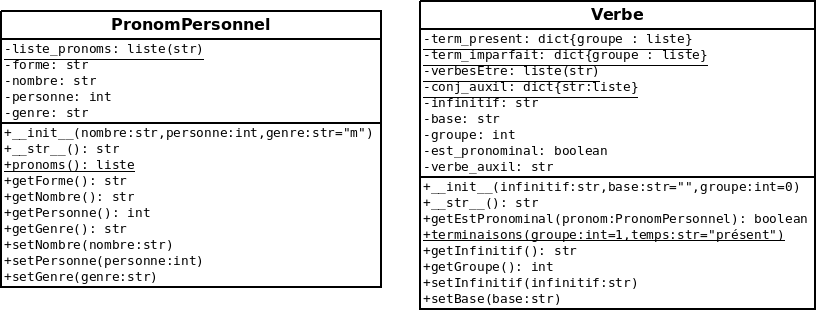

In [ ]:
class Verbe:
    
    verbesEtre = ["aller", "venir", "entrer", "sortir", "monter", "descendre", 
                  "tomber", "rester", "naître", "mourir", "arriver", "partir"]

    
    # listes de terminaisons
    term_present = {
            1: ["e", "es", "e", "ons", "ez", "ent"], 
            2: ["is", "is", "it", "issons", "issez", "issent"]
        }

    term_imparfait = {
            1 : ["ais", "ais", "ait", "ions", "iez", "aient"],
            2 : ["issais", "issais", "issait", "issions", "issiez", "issaient"]
        }
    term_futur = { 
            1: ["erai", "eras", "era", "erons", "erez", "eront"], 
            2: ["irai", "iras", "ira", "irons", "irez", "iront"]
        }
    term_cond_present = {
            1: ["erais", "erais", "erait", "erions", "eriez", "eraient"], 
            2: ["irais", "irais", "irait", "irions", "iriez", "iraient"]
        }
    

    def __init__(self, infinitif, base = "", groupe = 0):
        self.infinitif = infinitif
        
        if base != "" :
            self.base = base
        else :
            self.base = infinitif[0:-2]
        if groupe != 0 :
            self.groupe = groupe
        else :
            self.groupe = 3
            if infinitif.endswith("er") :
                self.groupe = 1
            elif infinitif.endswith("ir") :
                self.groupe = 2
                
        self.est_pronominal = False
        if infinitif.startswith("se ") or infinitif.startswith("s'"):
            self.est_pronominal = True
        
        self.verbe_auxil = "avoir"
        if self.est_pronominal or self.infinitif in Verbe.verbesEtre:
            self.verbe_auxil = "être"
            
        if self.groupe == 1:
            self.forme_pp = self.base + "é"

        if self.groupe == 2:
            self.forme_pp = self.base + "i"
        
    
    def __str__(self) :
        """Methode pour l'affichage"""
        return self.infinitif + " : " + self.base + " " + str(self.groupe)
    
    # avoir et être pour les temps composés :
    conj_auxil = {
            "avoir" : ["ai", "as", "a", "avons", "avez", "ont"],
            "être"  : ["suis", "es", "est", "sommes", "êtes", "sont"]
            }
    
    def conjuguer(self, pron, temps='present') :
        """Conjugaison avec un PronomPersonnel"""
        
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.personne - 1
        if pron.nombre == "pl" :
            indice = pron.personne + 2
        
        if temps in ["present", "imparfait", "futur", "cond_present"] :
            liste_term = Verbe.terminaisons(self.groupe, temps)

            if not liste_term:
                return "[forme inconnue]"

            return pron.forme + " " + self.base + liste_term[indice]
    
        if temps=="passe_compose" :
            forme_conjuguee = pron.forme + " " + Verbe.conj_auxil[self.verbe_auxil][indice] + " " + self.forme_pp
            
            if pron.genre == "f" and self.verbe_auxil == "être" :
                forme_conjuguee += "e"
            
            if pron.nombre == "pl" and self.verbe_auxil == "être" :
                forme_conjuguee += "s"    
            
            return forme_conjuguee
                
        return "[forme inconnue]"
    
    @staticmethod
    def terminaisons(groupe = 1, temps = "present"):
        if temps=="present" :
            return Verbe.term_present[groupe]
        
        if temps=="imparfait" :
            return Verbe.term_imparfait[groupe]
        
        if temps == 'futur' :
            return Verbe.term_futur[groupe]
        
        if temps == 'cond_present' :
            return Verbe.term_cond_present[groupe]

In [ ]:
class PronomPersonnel :
    # liste de pronoms
    liste_pronoms = ["je", "tu", ["il", "elle"], "nous", "vous", ["ils", "elles"] ]
               
    # constructeur
    def __init__(self, nombre, personne, genre="m"):
        # verification de la validite des donnees :
        if nombre not in ["sg", "pl"] or personne not in [1,2,3] or genre not in ["m", "f"]:
            print("Erreur ! Appel à PronomPersonnel avec arguments invalides.")
            return
        
        self.nombre = nombre
        self.personne = personne
        self.genre = genre
        
        if nombre == "sg" :
            self.forme = PronomPersonnel.liste_pronoms[personne-1]
        else :
            self.forme = PronomPersonnel.liste_pronoms[personne+2]
        
        if personne == 3 :
            if genre == "m":
                self.forme = self.forme[0]
            else :
                self.forme = self.forme[1]
                
    # conversion en str
    def __str__(self):
        return self.forme + " (" + self.nombre + "," + str(self.personne) + self.genre + ")"

    # affichage de la liste des pronoms
    @staticmethod
    def pronoms():
        print(PronomPersonnel.liste_pronoms)

## Pointers

Une différence fondamentale existe entre les variables simples (int, float, bool, str...) et les objets, quant à la façon dont ils sont stockés dans la mémoire.

In [20]:
x = 5
y = 5
print( x == y )

True


In [22]:
v1 = Verbe("penser")
v2 = Verbe("penser")
print (v1 == v2 )

False


In [ ]:
print(v1)
print(v2)

Deux objets peuvent être différents, mais avoir les mêmes valeurs de touts les champs. La comparaison "==" vérifie s'il s'agit du même objet ou non.

De même, un même objet peut être accédé par différents noms de variables :

In [23]:
v1 = Verbe("penser")
monVerbe = v1 ### Attention, ceci ne cree pas de copie de l'objet. Les deux variables pointent vers le meme objet !

# modification de monVerbe :
monVerbe.infinitif = "dormir"
print(monVerbe)

dormir : pens 1


In [24]:
# observons les valeurs de v1 :
print(v1)

dormir : pens 1


In [25]:
# pour comparer, faisons la meme chose avec des chaines de caracteres :
s1 = "penser"
monStr = s1
# modification de monStr :
monStr = "dormir"
print(monStr)
print(s1)  # s1 n'a pas ete modifie !

dormir
penser


Quelles sont les raisons pour ce fonctionnement :
- Le contenu d'une variable-objet, par ex. v1, est en fait un adresse de mémoire (pointer) qui contient les informations où sont stockés tous les champs de l'objet (adresses dans la mémoire).
- Quand on fait une affectation (=), la nouvelle variable (monVerbe) contient la même valeur, et donc la même adresse mémoire qui pointe vers les mêmes adresses des champs.

Résultat :
- l'affectation (=) ne crée pas de nouvelle copie d'un objet. Elle permet de donner un nouveau nom du même objet.
- pour créer un nouvel objet, nous sommes obligés d'appeler le constructeur.
- la comparaison entre deux objets (==) retourne True uniquement s'il s'agit du même objet.

Les listes, en tant que variables complexes, sont également des objets :

In [4]:
liste1 = [1,2,3,5]
liste2 = liste1
liste2.append(10)
liste2.append(24)

print(liste1) 

[1, 2, 3, 5, 10, 24]


La même chose est vrai pour les dictionnaires, ensembles, etc.

La fonction id() donne l'adresse mémoire d'un objet :

In [11]:
print( id(liste1) )
print( id(liste2) )

139839850106432
139839850106432


In [26]:
v1 = Verbe("penser")
v2 = Verbe("penser")
print ( id(v1) )
print ( id(v2) )

4424733840
4424524464


### Créer une copie d'un objet avec copy.copy()

In [7]:
import copy

liste2 = copy.copy(liste1)

print(id(liste1))
print(id(liste2))

140483561825408
140483823652736


In [ ]:
import copy

v1 = Verbe("penser")
v2 = copy.copy(v1) # nouvelle copie, ce n'est plus le même objet

In [ ]:
v2.infinitif = "dormir"
print(v2)

In [ ]:
print(v1)

Voir documentation ici : https://docs.python.org/fr/3/library/copy.html

Deux possibilités :
- copy.copy()
- copy.deepcopy()